# Chemical reactors: CSTR, PFR
This file shows how to model dynamics of chemical reactors.

Here, we import two modules:
* `models` : contains reactors `.CSTR()`, `.PFR()`, and `.Chemistry()`.
* `tools` : contains various inlet functions, like `.step()`, or `.gaussian()`

In [1]:
from chemreact import models, tools

## 1. CSTR reactor:
It is modelled unig perfect mixing approximation:
$$
[\text{accumulation}] = [\text{in}] - [\text{out}] + [\text{generation}]
$$

Or, in mathtematical form:
$$
\frac{dC}{dt} = \frac{q}{V}(C_{in} - C_{out}) + r_i 
$$
, where:
* $q$ - volumetric flowrate
* $V$ - reactor volume
* $C_{in}$ and $C_{out}$ - inlet and outlet concentrations
* $r_i$ - reaction rate

The reactor model is created with the command `models.CSTR(q=.., V=..)`, where `q` is flowrate and `V` is reactor volume.

In [2]:
r = models.CSTR(q=1, V=5)

## Inlet functions:
Reactor inlet concentrations can be defined in the similar way as in chemistry module, `.inlet(A=..)`, where `A` is the name of species.

Reactor can have steady inlet:

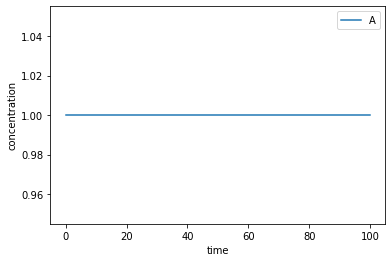

run time: 0.008s


In [3]:
r.inlet(A=1)
r.run()

Or time-varying inlet, according to one of the following funtions:

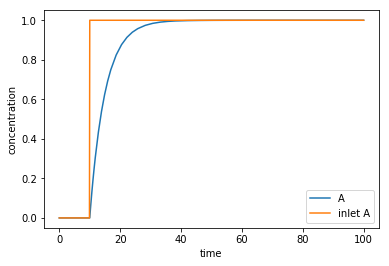

run time: 0.053s


In [4]:
r.inlet(A=tools.step(t1=10, y0=0, y1=1))
r.run()

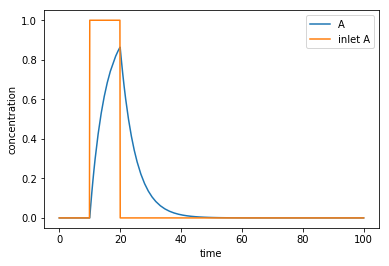

run time: 0.078s


In [5]:
r.inlet(A=tools.rect(t0=10, t1=20, y0=0, y1=1))
r.run()

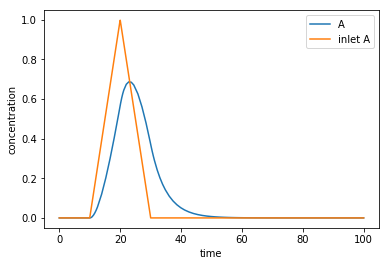

run time: 0.094s


In [6]:
r.inlet(A=tools.triangle(t0=10, t1=20, t2=30, y0=0, y1=1))
r.run()

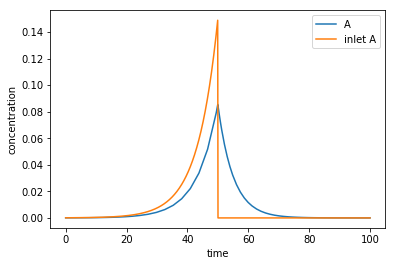

run time: 0.074s


In [7]:
r.inlet(A=tools.exponential(t1=50, y_tot=1, c=0.15))
r.run()

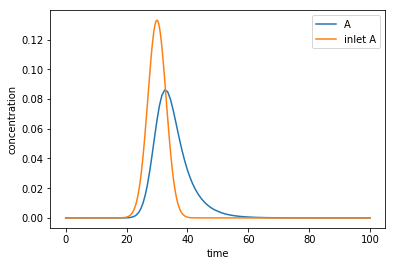

run time: 0.091s


In [8]:
r.inlet(A=tools.gaussian(t1=30, y_tot=1, sig=3))
r.run()

## Adding chemistry to reactor:
Any chemical model can be separately defined, and added to any reactor. This adds $r_i$ term in reactor mass balance:

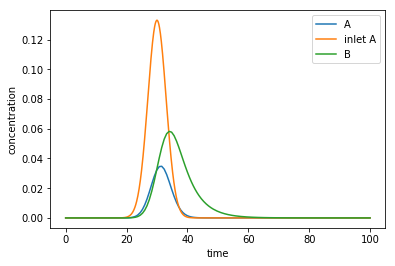

run time: 0.109s


In [9]:
c = models.Chemistry()
c.reaction('A=>B', k=0.5)
r.chemistry = c
r.run()

### Simulation time
Start and end time of simulation can be set with `.time_start` and `.time_stop` reactor parameters:

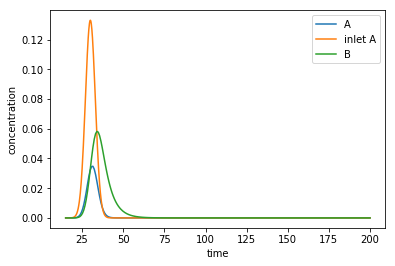

run time: 0.072s


In [10]:
r.time_start=15
r.time_stop=200
r.run()

## 2. PFR
PFR reactor is acting like a delay in the system. At this stage, there is no diffusion simulated.

$$
C_{out}(t) = C_{in}(t-\Delta t)+X_i(\Delta t)
$$
, where:
* $t$ - time, 
* $X_i$ - species conversion due to chemical reaction, 
* $\Delta t = \frac{V}{q}$ - residence time

$X_i$ is simulated by modelling the extent of chemical reaction during $\Delta t$, kinetic profiles are not stored.

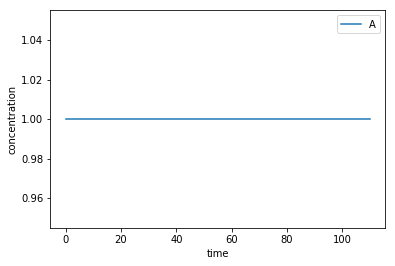

run time: 0.014s


In [11]:
r2 = models.PFR(q=1, V=10)
r2.inlet(A=1)
r2.run()

PFR can be used to represent delay in the system in the absence of reactions.

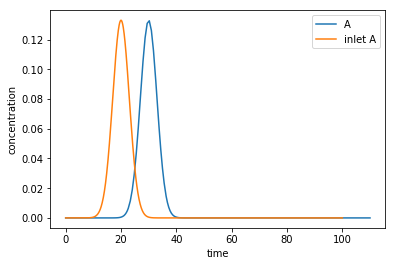

run time: 0.064s


In [12]:
r2.inlet(A=tools.gaussian(sig=3))
r2.run()

Chemistry can be added to PFR.

Note: due to inefficient simulation method, PFR with chemistry module can take a bit of time to solve:

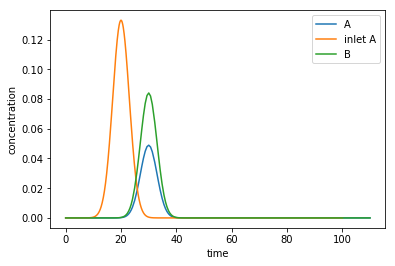

run time: 1.772s


In [13]:
c2 = models.Chemistry()
c2.reaction('A=>B', k=0.1)
r2.chemistry = c2
r2.run()

## Additional features

For any reactor, numerical values for outlet can be accessed with `.solution['variable']` parameter:

In [14]:
print(r2.solution['t'])
print(r2.solution['A'])

[  0.          10.00012325  10.00024651  10.00147906  10.00271161
  10.01503709  10.02736256  10.15061736  10.27387216  11.50642012
  12.73896808  15.20406401  16.15905315  16.85812503  17.2409923
  17.62385958  18.33402753  18.75714348  19.18025943  19.49929241
  19.8183254   20.13735839  20.48998471  20.84261103  21.
  21.          21.00003497  21.00006993  21.0004196   21.00076928
  21.00351121  21.00625315  21.03367255  21.06109194  21.14063152
  21.22017109  21.29971067  21.42599496  21.55227926  21.67856356
  21.9043048   22.13004604  22.35578729  22.80471323  23.25363917
  23.70256511  24.15149105  24.93369357  25.71589609  26.31464555
  26.91339501  27.51214447  28.11089393  28.75032561  29.3897573
  30.02918898  30.66862066  31.30805234  32.18507517  32.84975945
  33.51444372  34.17912799  34.84381227  35.50849654  36.06684892
  36.6252013   37.18355368  37.63160425  38.07965482  38.52770538
  38.97575595  39.42380652  39.84014341  40.2564803   40.67281719
  41.08915408  41.50